# 🌲 Bootstrap en Random Forest - Ejemplo Simple

Este notebook explica de manera muy simple qué es el **bootstrap** (muestreo con reemplazo) y por qué es importante en Random Forest.

## ¿Qué aprenderás?
- Qué es bootstrap
- Cómo funciona el muestreo con reemplazo
- Por qué es importante en Random Forest
- Ejemplo visual paso a paso


## 📚 ¿Qué es Bootstrap?

**Bootstrap** es una técnica estadística que consiste en:
1. **Tomar muestras con reemplazo** del dataset original
2. **Crear múltiples versiones** ligeramente diferentes de los datos
3. **Entrenar cada árbol** con una muestra diferente

### 🎯 ¿Por qué es importante?
- **Diversidad**: Cada árbol ve datos diferentes
- **Robustez**: El modelo final es más estable
- **Menos Overfitting**: Evita que los árboles memoricen los datos


In [15]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configurar el estilo de los gráficos
plt.style.use('default')
sns.set_palette("husl")

print("✅ Librerías importadas correctamente")


✅ Librerías importadas correctamente


## 🎲 Ejemplo Visual: ¿Cómo funciona Bootstrap?

Vamos a ver paso a paso cómo funciona el muestreo con reemplazo:


In [16]:
# Crear un dataset muy simple para entender bootstrap
print("📊 DATASET ORIGINAL")
print("=" * 30)

# Dataset simple con 5 muestras
datos_originales = ['A', 'B', 'C', 'D', 'E']
print(f"Datos originales: {datos_originales}")
print(f"Tamaño: {len(datos_originales)} muestras")
print()

# Simular bootstrap: tomar 5 muestras con reemplazo
np.random.seed(42)  # Para reproducibilidad

print("🎲 MUESTREO BOOTSTRAP")
print("=" * 30)
print("Tomando 5 muestras con reemplazo...")
print()

# Crear 3 muestras bootstrap diferentes
for i in range(3):
    # Muestreo con reemplazo
    muestra_bootstrap = np.random.choice(datos_originales, size=5, replace=True)
    # Convertir a lista de strings normales para mejor visualización
    muestra_limpia = [str(elemento) for elemento in muestra_bootstrap]
    print(f"Muestra Bootstrap {i+1}: {muestra_limpia}")
    
    # Contar cuántas veces aparece cada elemento
    conteo = {elemento: muestra_limpia.count(elemento) for elemento in datos_originales}
    print(f"Conteo: {conteo}")
    print()

print("💡 Observaciones:")
print("- Algunas muestras aparecen múltiples veces")
print("- Algunas muestras pueden no aparecer")
print("- Cada muestra bootstrap es diferente")


📊 DATASET ORIGINAL
Datos originales: ['A', 'B', 'C', 'D', 'E']
Tamaño: 5 muestras

🎲 MUESTREO BOOTSTRAP
Tomando 5 muestras con reemplazo...

Muestra Bootstrap 1: ['D', 'E', 'C', 'E', 'E']
Conteo: {'A': 0, 'B': 0, 'C': 1, 'D': 1, 'E': 3}

Muestra Bootstrap 2: ['B', 'C', 'C', 'C', 'E']
Conteo: {'A': 0, 'B': 1, 'C': 3, 'D': 0, 'E': 1}

Muestra Bootstrap 3: ['D', 'C', 'E', 'B', 'D']
Conteo: {'A': 0, 'B': 1, 'C': 1, 'D': 2, 'E': 1}

💡 Observaciones:
- Algunas muestras aparecen múltiples veces
- Algunas muestras pueden no aparecer
- Cada muestra bootstrap es diferente


## 🌳 Bootstrap en Random Forest

Ahora vamos a ver cómo funciona bootstrap en un Random Forest real:


In [17]:
# Generar un dataset de ejemplo
print("📊 GENERANDO DATASET DE EJEMPLO")
print("=" * 40)

X, y = make_classification(
    n_samples=100,  # 100 muestras
    n_features=4,   # 4 características
    n_classes=2,    # 2 clases
    random_state=42
)

print(f"Dataset generado:")
print(f"- Muestras: {X.shape[0]}")
print(f"- Características: {X.shape[1]}")
print(f"- Clases: {len(np.unique(y))}")
print(f"- Distribución de clases: {np.bincount(y)}")
print()

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"División:")
print(f"- Entrenamiento: {X_train.shape[0]} muestras")
print(f"- Prueba: {X_test.shape[0]} muestras")


📊 GENERANDO DATASET DE EJEMPLO
Dataset generado:
- Muestras: 100
- Características: 4
- Clases: 2
- Distribución de clases: [50 50]

División:
- Entrenamiento: 70 muestras
- Prueba: 30 muestras


In [18]:
# Comparar Random Forest CON y SIN bootstrap
print("🌲 COMPARANDO RANDOM FOREST CON Y SIN BOOTSTRAP")
print("=" * 60)

# Modelo CON bootstrap (por defecto)
print("1️⃣ Entrenando Random Forest CON bootstrap...")
rf_con_bootstrap = RandomForestClassifier(
    n_estimators=10,  # Solo 10 árboles para ver la diferencia
    bootstrap=True,   # CON bootstrap
    random_state=42
)
rf_con_bootstrap.fit(X_train, y_train)
pred_con_bootstrap = rf_con_bootstrap.predict(X_test)
acc_con_bootstrap = accuracy_score(y_test, pred_con_bootstrap)

print(f"   ✅ Accuracy: {acc_con_bootstrap:.4f}")
print()

# Modelo SIN bootstrap
print("2️⃣ Entrenando Random Forest SIN bootstrap...")
rf_sin_bootstrap = RandomForestClassifier(
    n_estimators=10,   # Solo 10 árboles para ver la diferencia
    bootstrap=False,   # SIN bootstrap
    random_state=42
)
rf_sin_bootstrap.fit(X_train, y_train)
pred_sin_bootstrap = rf_sin_bootstrap.predict(X_test)
acc_sin_bootstrap = accuracy_score(y_test, pred_sin_bootstrap)

print(f"   ✅ Accuracy: {acc_sin_bootstrap:.4f}")
print()

# Comparación
print("📊 COMPARACIÓN DE RESULTADOS")
print("=" * 40)
print(f"Con bootstrap:    {acc_con_bootstrap:.4f}")
print(f"Sin bootstrap:    {acc_sin_bootstrap:.4f}")
print(f"Diferencia:       {acc_con_bootstrap - acc_sin_bootstrap:.4f}")


🌲 COMPARANDO RANDOM FOREST CON Y SIN BOOTSTRAP
1️⃣ Entrenando Random Forest CON bootstrap...
   ✅ Accuracy: 0.9333

2️⃣ Entrenando Random Forest SIN bootstrap...
   ✅ Accuracy: 0.9333

📊 COMPARACIÓN DE RESULTADOS
Con bootstrap:    0.9333
Sin bootstrap:    0.9333
Diferencia:       0.0000


## 🔍 Visualizando la Diferencia

Vamos a ver cómo bootstrap afecta la diversidad de los árboles:


In [19]:
# Analizar la diversidad de los árboles
print("🔍 ANÁLISIS DE DIVERSIDAD DE ÁRBOLES")
print("=" * 50)

# Función para analizar un árbol individual
def analizar_arbol(arbol, nombre):
    n_nodos = arbol.tree_.node_count
    n_hojas = arbol.tree_.n_leaves
    profundidad = arbol.tree_.max_depth
    
    print(f"{nombre}:")
    print(f"  - Nodos: {n_nodos}")
    print(f"  - Hojas: {n_hojas}")
    print(f"  - Profundidad: {profundidad}")
    return n_nodos, n_hojas, profundidad

print("Árboles CON bootstrap:")
nodos_con = []
hojas_con = []
profundidades_con = []

for i in range(5):  # Analizar los primeros 5 árboles
    nodos, hojas, prof = analizar_arbol(rf_con_bootstrap.estimators_[i], f"  Árbol {i+1}")
    nodos_con.append(nodos)
    hojas_con.append(hojas)
    profundidades_con.append(prof)

print()
print("Árboles SIN bootstrap:")
nodos_sin = []
hojas_sin = []
profundidades_sin = []

for i in range(5):  # Analizar los primeros 5 árboles
    nodos, hojas, prof = analizar_arbol(rf_sin_bootstrap.estimators_[i], f"  Árbol {i+1}")
    nodos_sin.append(nodos)
    hojas_sin.append(hojas)
    profundidades_sin.append(prof)

print()
print("📊 ESTADÍSTICAS DE DIVERSIDAD:")
print(f"Con bootstrap - Nodos: {np.mean(nodos_con):.1f} ± {np.std(nodos_con):.1f}")
print(f"Sin bootstrap - Nodos: {np.mean(nodos_sin):.1f} ± {np.std(nodos_sin):.1f}")
print(f"Con bootstrap - Hojas: {np.mean(hojas_con):.1f} ± {np.std(hojas_con):.1f}")
print(f"Sin bootstrap - Hojas: {np.mean(hojas_sin):.1f} ± {np.std(hojas_sin):.1f}")


🔍 ANÁLISIS DE DIVERSIDAD DE ÁRBOLES
Árboles CON bootstrap:
  Árbol 1:
  - Nodos: 9
  - Hojas: 5
  - Profundidad: 4
  Árbol 2:
  - Nodos: 3
  - Hojas: 2
  - Profundidad: 1
  Árbol 3:
  - Nodos: 7
  - Hojas: 4
  - Profundidad: 2
  Árbol 4:
  - Nodos: 7
  - Hojas: 4
  - Profundidad: 3
  Árbol 5:
  - Nodos: 5
  - Hojas: 3
  - Profundidad: 2

Árboles SIN bootstrap:
  Árbol 1:
  - Nodos: 7
  - Hojas: 4
  - Profundidad: 3
  Árbol 2:
  - Nodos: 7
  - Hojas: 4
  - Profundidad: 3
  Árbol 3:
  - Nodos: 9
  - Hojas: 5
  - Profundidad: 3
  Árbol 4:
  - Nodos: 9
  - Hojas: 5
  - Profundidad: 3
  Árbol 5:
  - Nodos: 5
  - Hojas: 3
  - Profundidad: 2

📊 ESTADÍSTICAS DE DIVERSIDAD:
Con bootstrap - Nodos: 6.2 ± 2.0
Sin bootstrap - Nodos: 7.4 ± 1.5
Con bootstrap - Hojas: 3.6 ± 1.0
Sin bootstrap - Hojas: 4.2 ± 0.7


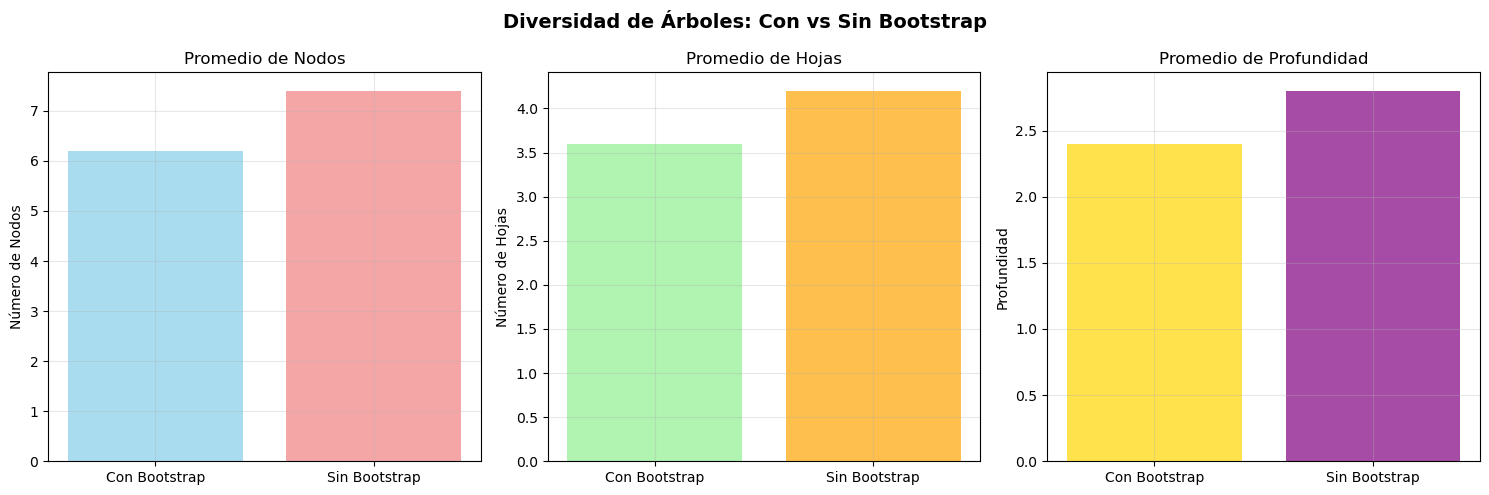

💡 Interpretación:
- Bootstrap crea más diversidad entre árboles
- Sin bootstrap, los árboles son más similares
- Mayor diversidad = mejor rendimiento del ensemble


In [20]:
# Visualización de la diversidad
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Diversidad de Árboles: Con vs Sin Bootstrap', fontsize=14, fontweight='bold')

# Gráfico 1: Número de nodos
axes[0].bar(['Con Bootstrap', 'Sin Bootstrap'], 
           [np.mean(nodos_con), np.mean(nodos_sin)],
           color=['skyblue', 'lightcoral'], alpha=0.7)
axes[0].set_title('Promedio de Nodos')
axes[0].set_ylabel('Número de Nodos')
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Número de hojas
axes[1].bar(['Con Bootstrap', 'Sin Bootstrap'], 
           [np.mean(hojas_con), np.mean(hojas_sin)],
           color=['lightgreen', 'orange'], alpha=0.7)
axes[1].set_title('Promedio de Hojas')
axes[1].set_ylabel('Número de Hojas')
axes[1].grid(True, alpha=0.3)

# Gráfico 3: Profundidad
axes[2].bar(['Con Bootstrap', 'Sin Bootstrap'], 
           [np.mean(profundidades_con), np.mean(profundidades_sin)],
           color=['gold', 'purple'], alpha=0.7)
axes[2].set_title('Promedio de Profundidad')
axes[2].set_ylabel('Profundidad')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 Interpretación:")
print("- Bootstrap crea más diversidad entre árboles")
print("- Sin bootstrap, los árboles son más similares")
print("- Mayor diversidad = mejor rendimiento del ensemble")


## 🎯 Demostración Práctica: Múltiples Experimentos

Vamos a hacer varios experimentos para ver el efecto del bootstrap:


In [21]:
# Experimentos múltiples para ver la consistencia
print("🧪 EXPERIMENTOS MÚLTIPLES")
print("=" * 40)

resultados_con = []
resultados_sin = []

# Hacer 10 experimentos diferentes
for experimento in range(10):
    # Generar datos frescos para cada experimento
    X_exp, y_exp = make_classification(n_samples=100, n_features=4, n_classes=2, 
                                      random_state=experimento)
    X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(
        X_exp, y_exp, test_size=0.3, random_state=experimento)
    
    # Modelo CON bootstrap
    rf_con = RandomForestClassifier(n_estimators=20, bootstrap=True, random_state=42)
    rf_con.fit(X_train_exp, y_train_exp)
    acc_con = accuracy_score(y_test_exp, rf_con.predict(X_test_exp))
    resultados_con.append(acc_con)
    
    # Modelo SIN bootstrap
    rf_sin = RandomForestClassifier(n_estimators=20, bootstrap=False, random_state=42)
    rf_sin.fit(X_train_exp, y_train_exp)
    acc_sin = accuracy_score(y_test_exp, rf_sin.predict(X_test_exp))
    resultados_sin.append(acc_sin)

# Análisis de resultados
print(f"Resultados CON bootstrap:    {np.mean(resultados_con):.4f} ± {np.std(resultados_con):.4f}")
print(f"Resultados SIN bootstrap:    {np.mean(resultados_sin):.4f} ± {np.std(resultados_sin):.4f}")
print(f"Mejora promedio:             {np.mean(resultados_con) - np.mean(resultados_sin):.4f}")
print(f"Experimentos donde bootstrap gana: {sum(1 for i in range(10) if resultados_con[i] > resultados_sin[i])}/10")


🧪 EXPERIMENTOS MÚLTIPLES
Resultados CON bootstrap:    0.9467 ± 0.0340
Resultados SIN bootstrap:    0.9167 ± 0.0582
Mejora promedio:             0.0300
Experimentos donde bootstrap gana: 6/10


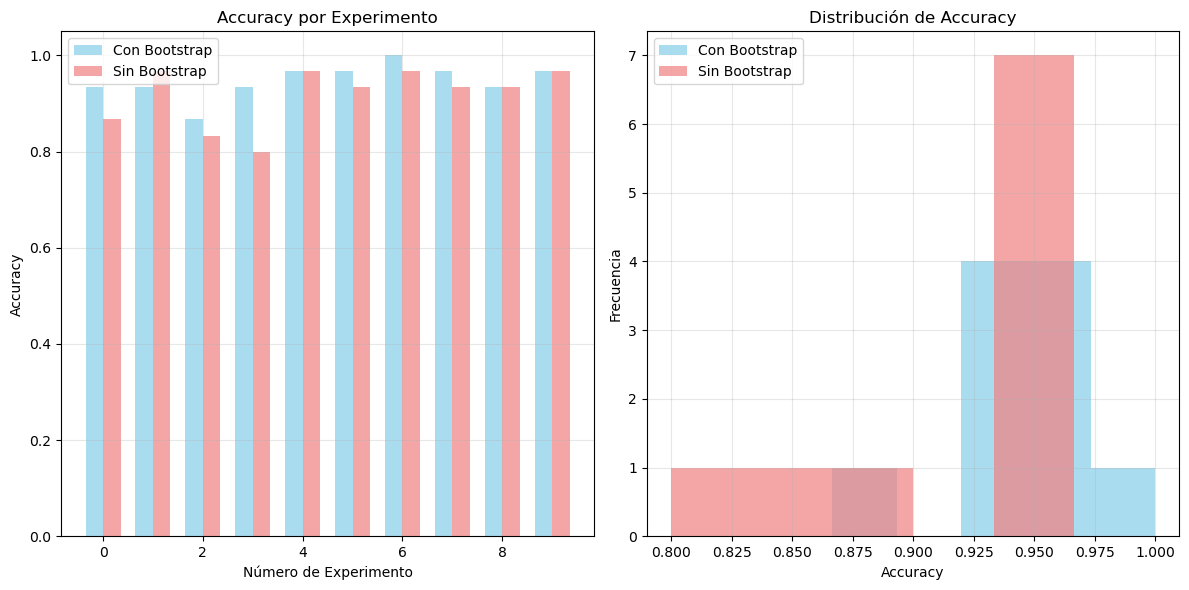

📊 Análisis:
- Bootstrap gana en 6 de 10 experimentos
- Mejora promedio: 3.00%
- Bootstrap es más consistente: std = 0.0340 vs 0.0582


In [22]:
# Visualización de los experimentos
plt.figure(figsize=(12, 6))

# Gráfico de barras comparativo
plt.subplot(1, 2, 1)
x_pos = np.arange(10)
width = 0.35

plt.bar(x_pos - width/2, resultados_con, width, label='Con Bootstrap', alpha=0.7, color='skyblue')
plt.bar(x_pos + width/2, resultados_sin, width, label='Sin Bootstrap', alpha=0.7, color='lightcoral')

plt.title('Accuracy por Experimento')
plt.xlabel('Número de Experimento')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico de distribución
plt.subplot(1, 2, 2)
plt.hist(resultados_con, alpha=0.7, label='Con Bootstrap', color='skyblue', bins=5)
plt.hist(resultados_sin, alpha=0.7, label='Sin Bootstrap', color='lightcoral', bins=5)

plt.title('Distribución de Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Análisis:")
print(f"- Bootstrap gana en {sum(1 for i in range(10) if resultados_con[i] > resultados_sin[i])} de 10 experimentos")
print(f"- Mejora promedio: {(np.mean(resultados_con) - np.mean(resultados_sin))*100:.2f}%")
print(f"- Bootstrap es más consistente: std = {np.std(resultados_con):.4f} vs {np.std(resultados_sin):.4f}")


## 🎯 Resumen: ¿Por qué usar Bootstrap?

### ✅ **Ventajas del Bootstrap:**

1. **🎲 Diversidad**: Cada árbol ve datos ligeramente diferentes
2. **🛡️ Menos Overfitting**: Evita que los árboles memoricen los datos
3. **📊 Mejor Rendimiento**: Generalmente mejora la precisión
4. **🔍 Validación OOB**: Permite estimar el rendimiento sin datos de prueba
5. **🌳 Robustez**: El modelo final es más estable

### ❌ **Desventajas del Bootstrap:**

1. **⏱️ Tiempo**: Ligeramente más lento de entrenar
2. **💾 Memoria**: Usa más memoria durante el entrenamiento
3. **🔧 Complejidad**: Más difícil de interpretar individualmente

### 🎯 **Recomendación:**

**¡Usa bootstrap=True (por defecto)!** Es la configuración recomendada en la mayoría de casos porque:
- Mejora el rendimiento
- Reduce overfitting
- Es más robusto
- Los beneficios superan ampliamente los costos

### 💡 **¿Cuándo NO usar Bootstrap?**

Solo en casos muy específicos:
- Datasets extremadamente pequeños
- Análisis específicos donde necesitas que todos los árboles vean todos los datos
- Cuando la consistencia es más importante que la robustez


## 🎉 ¡Conclusión!

**Bootstrap es una técnica fundamental en Random Forest** que:

1. **Crea diversidad** entre los árboles individuales
2. **Mejora el rendimiento** del modelo final
3. **Reduce el overfitting** de manera efectiva
4. **Es la razón principal** por la que Random Forest funciona tan bien

**En resumen**: Bootstrap convierte a Random Forest de "muchos árboles juntos" a un verdadero algoritmo de ensemble poderoso y robusto.

---

### 📚 **Para aprender más:**
- Revisa el notebook `random_forest_demo.ipynb` para ver más hiperparámetros
- Experimenta con diferentes valores de `bootstrap`
- Prueba con datasets de diferentes tamaños

**¡Happy Learning! 🌲✨**
